In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
red_wine=pd.read_csv('wine-quality Red.csv')
white_wine=pd.read_csv('wine-quality White.csv')

### Введение    


In [ ]:
wine_parameters = pd.read_csv("wine_parameters.csv")
wine_parameters

Parameter                                        Description
0         Fixed acidity  Показатель неиспаряющихся кислот, влияющий на ...
1      Volatile acidity  Показатель летучих кислот, таких как уксусная,...
2           Citric acid  Натуральная кислота, добавляемая для повышения...
3        Residual sugar  Сахар, остающийся в вине после ферментации, оп...
4             Chlorides  Соли, влияющие на вкус вина, могут придавать с...
5   Free sulfur dioxide  Консервант, предотвращающий окисление и развит...
6  Total sulfur dioxide  Суммарное количество свободного и связанного д...
7               Density  Показатель массы вина на единицу объёма, испол...
8                    pH  Показатель кислотности вина, обычно в пределах...
9             Sulphates  Соли серной кислоты, влияющие на вкус и структ...

In [ ]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


**В датасете нет пропущенных значений**

#Белое вино

## Поиск корелляций

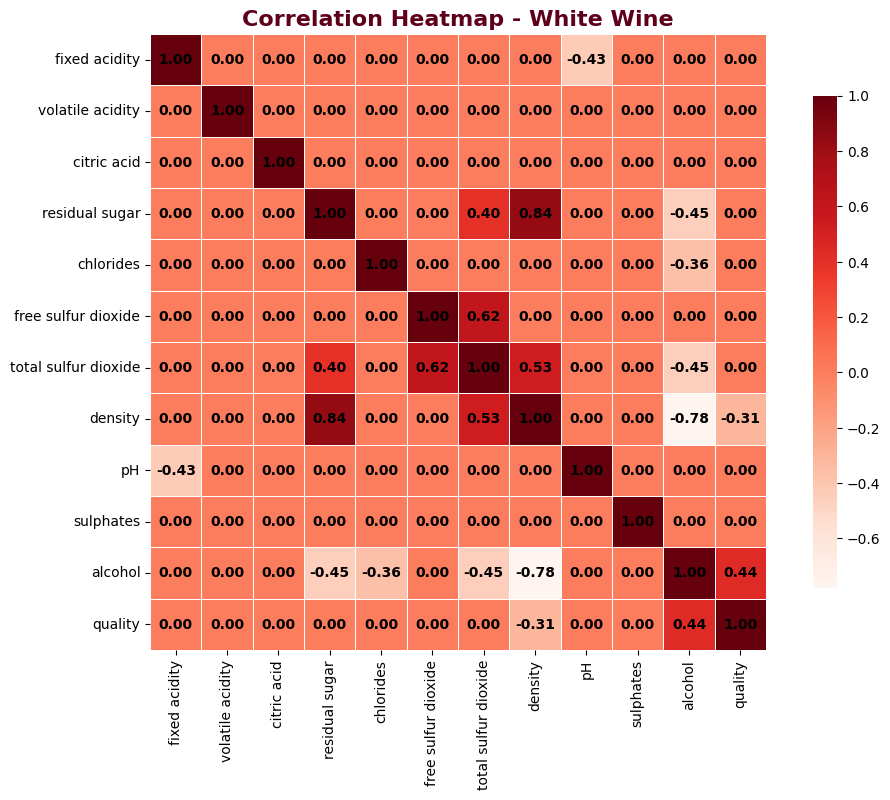

In [ ]:
corr = white_wine.corr()

# Заменяем значения от -0.3 до 0.3 на нули
corr_masked = np.where((corr >= -0.3) & (corr <= 0.3), 0, corr)

# Создаем тепловую карту
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_masked,
    annot=True,
    fmt=".2f",
    cmap='Reds',
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": .8},
    annot_kws={"size": 10, "weight": "bold", "color": "black"},
    xticklabels=white_wine.columns,
    yticklabels=white_wine.columns
)
plt.title('Correlation Heatmap - White Wine', fontsize=16, fontweight='bold', color='#5e001c')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Слабая корелляция до 0.3 заменена на нули.    
Зависимость количества сахара, спирта и плотности объясняется физическим законом. Так как плотность сахара больше плотности спирта, отсюда следует, что чем больше сахара (и меньше спирта), тем больше плотность.     
При этом можно заметить, что от количества спирта в вине зависит его оценка. Значит, людям больше нравится крепкое вино.     
Зависимость кислот в вине и pH объясняется химией.     
Интересно, что напрямую на оценку вина влияет только содержание спирта и сахара в нем.

## Зависимость качества белого вина от содержания спирта в нём

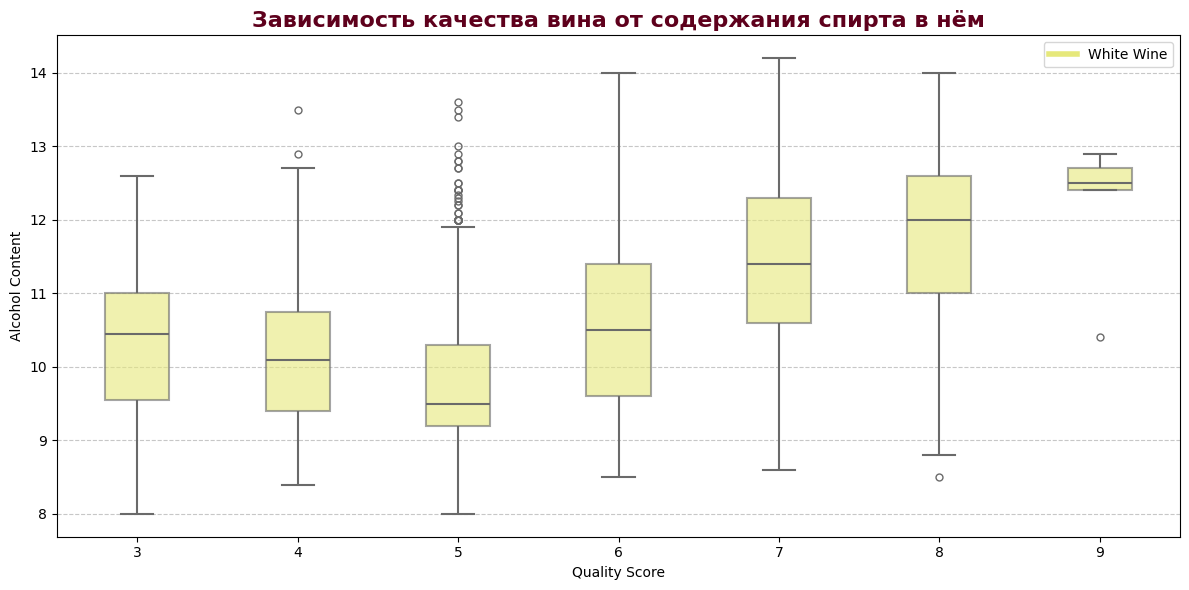

In [ ]:
plt.figure(figsize=(12, 6))

palette = ['#e6e87b']


sns.boxplot(x='quality', y='alcohol', data=white_wine, color=palette[0], width=0.4,
            fliersize=5, linewidth=1.5, boxprops=dict(facecolor=palette[0], alpha=0.6))


plt.title('Зависимость качества белого вина от содержания спирта в нём', fontsize=16, fontweight='bold', color='#5e001c')
plt.xlabel('Quality Score', fontsize=10)
plt.ylabel('Alcohol Content', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


plt.grid(axis='y', linestyle='--', alpha=0.7)


handles = [plt.Line2D([0], [0], color=palette[0], lw=4)]
plt.legend(handles, ['White Wine'], loc='upper right', fontsize=10)


plt.tight_layout()  # Adjust layout
plt.show()

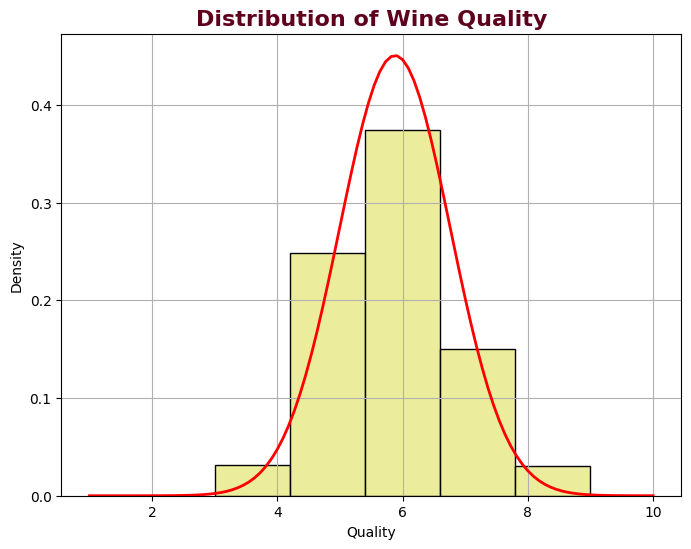

In [ ]:
plt.figure(figsize=(8, 6))


sns.histplot(white_wine['quality'], bins=5, stat='density', color='#e6e87b', edgecolor='black')


mean = np.mean(white_wine['quality'])
std_dev = np.std(white_wine['quality'])
x = np.linspace(1, 10, 100)
p = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)
plt.plot(x, p, 'r', linewidth=2)


plt.title('Distribution of Wine Quality', fontsize=16, fontweight='bold', color='#5e001c')
plt.xlabel('Quality', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.show()


## Сравнение хорошего и плохого белого вина

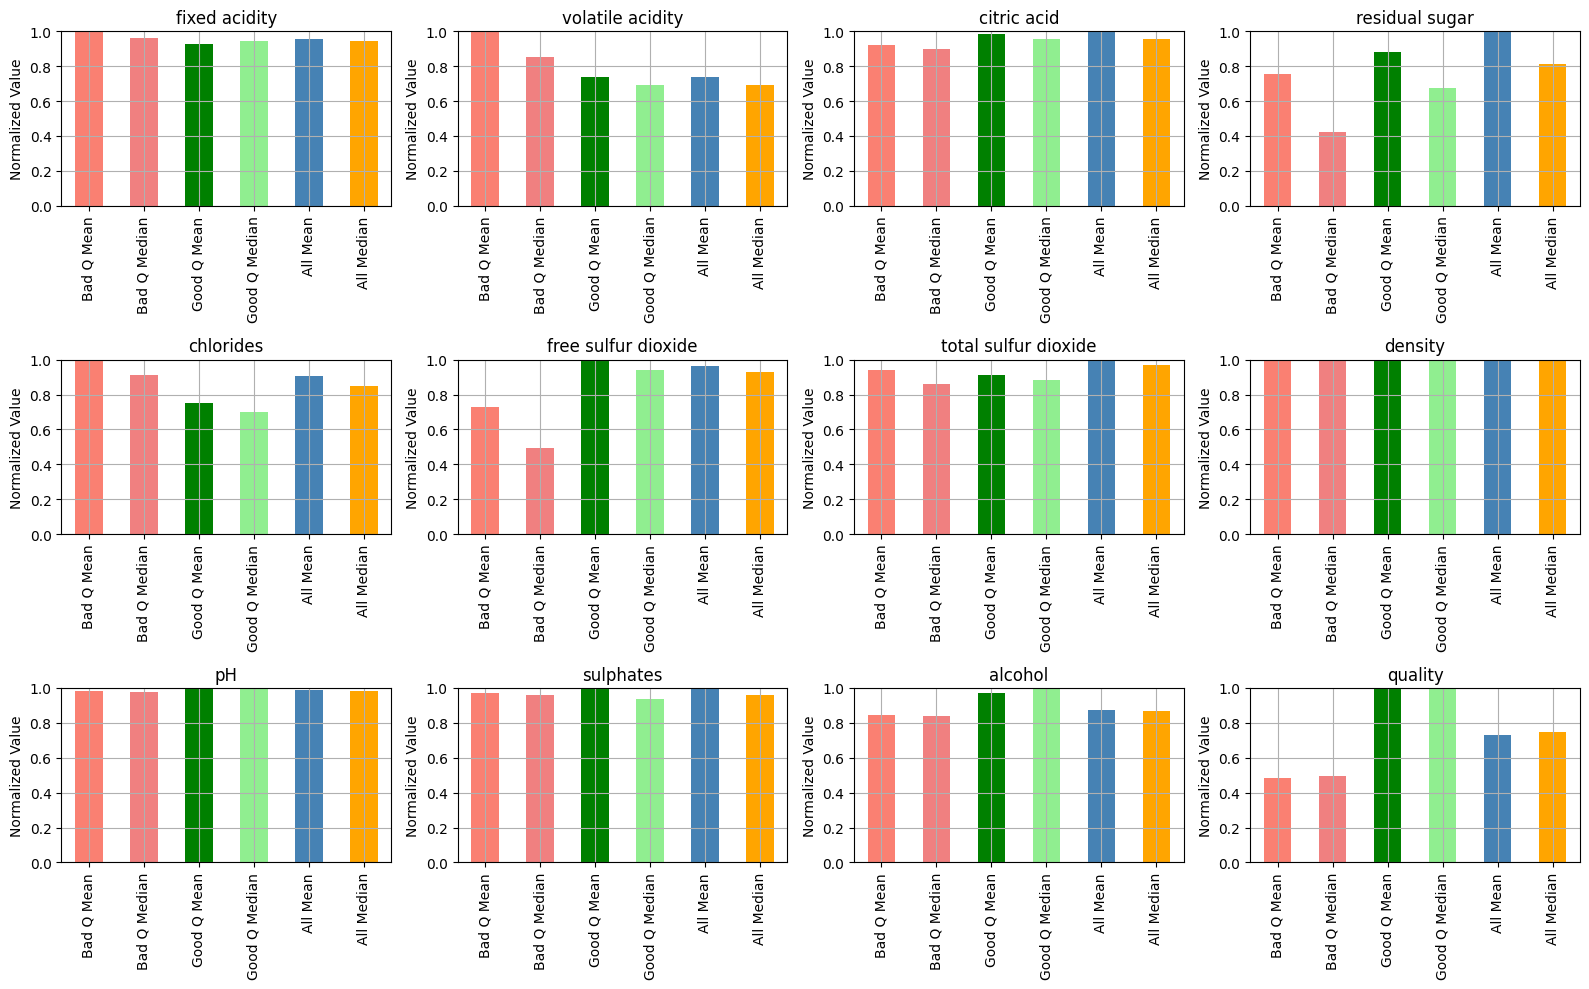

In [ ]:
white_wine_bad = white_wine[(white_wine['quality'] == 3) | (white_wine['quality'] == 4)]
white_wine_good = white_wine[(white_wine['quality'] == 8) | (white_wine['quality'] == 9)]
mean_bad = white_wine_bad.mean()
median_bad = white_wine_bad.median()
mean_good = white_wine_good.mean()
median_good = white_wine_good.median()
mean_all = white_wine.mean()
median_all = white_wine.median()
mean_combined = pd.concat([mean_bad, median_bad, mean_good, median_good, mean_all, median_all], axis=1)
mean_combined.columns = ['Bad Q Mean', 'Bad Q Median', 'Good Q Mean', 'Good Q Median', 'All Mean', 'All Median']
mean_combined.round(3)


normalized_mean_combined = mean_combined.div(mean_combined.max(axis=1), axis=0)


fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 10))
axes = axes.flatten()


for i, row in enumerate(normalized_mean_combined.index):
    normalized_mean_combined.loc[row].plot(kind='bar', ax=axes[i], color=['salmon', 'lightcoral', 'green', 'lightgreen', 'steelblue', 'orange'])
    axes[i].set_title(row)
    axes[i].set_ylabel('Normalized Value')
    axes[i].set_ylim(0, 1)
    axes[i].grid(True)


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()

**"Volatile acidity"** (летучая кислотность) — это показатель кислот, которые могут испаряться, главным образом уксусной кислоты. Высокий уровень летучей кислотности может придавать вину неприятные уксусные ароматы и считается дефектом, если превышает норму.

Действительно, если посмотреть на наши данные, в среднем у хорошего вина летучая кислотность меньше.

Содержание спирта в хорошем вине в среднем больше, чем в плохом.

# Красное вино

 ## Поиск корелляций

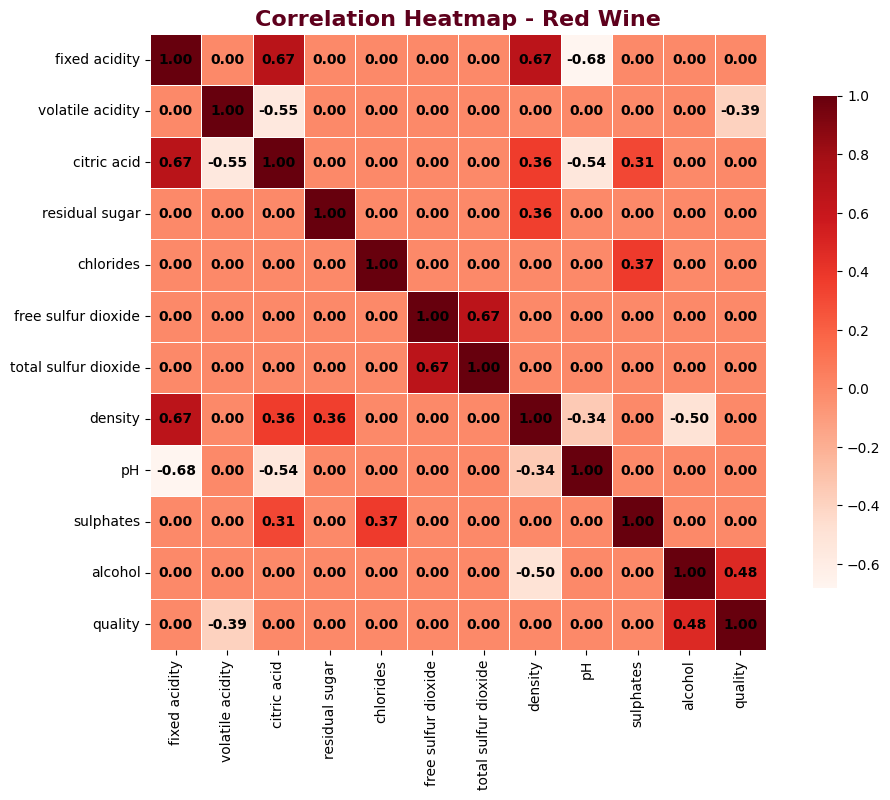

In [ ]:
corr = red_wine.corr()

# Заменяем значения от -0.3 до 0.3 на нули
corr_masked = np.where((corr >= -0.3) & (corr <= 0.3), 0, corr)

# Создаем тепловую карту
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_masked,
    annot=True,
    fmt=".2f",
    cmap='Reds',
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": .8},
    annot_kws={"size": 10, "weight": "bold", "color": "black"},
    xticklabels=red_wine.columns,
    yticklabels=red_wine.columns
)
plt.title('Correlation Heatmap - Red Wine', fontsize=16, fontweight='bold', color='#5e001c')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Корелляции для характеристик красного вина отличаются от тех, что были для белого вина.

Чем меньше летучих кислот в вине, тем выше его оценка.
Плотность кореллирует с фиксированной кислотностью, интересно почему.

## Зависимость качества красного вина от содержания спирта в нём

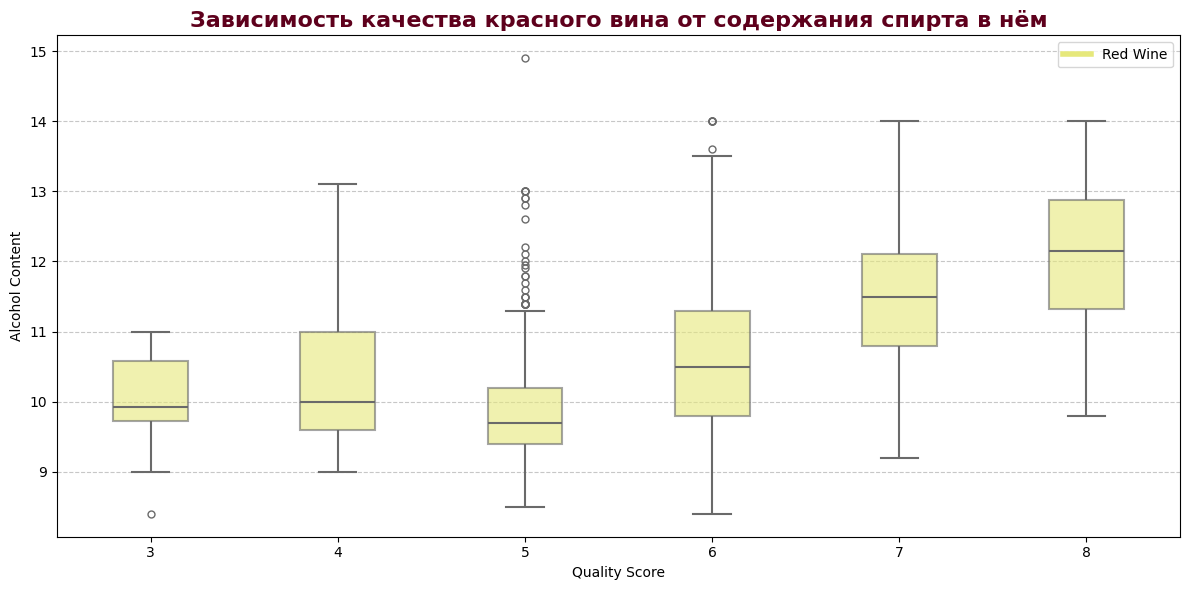

In [ ]:
plt.figure(figsize=(12, 6))

palette = ['#e6e87b']


sns.boxplot(x='quality', y='alcohol', data=red_wine, color=palette[0], width=0.4,
            fliersize=5, linewidth=1.5, boxprops=dict(facecolor=palette[0], alpha=0.6))


plt.title('Зависимость качества красного вина от содержания спирта в нём', fontsize=16, fontweight='bold', color='#5e001c')
plt.xlabel('Quality Score', fontsize=10)
plt.ylabel('Alcohol Content', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


plt.grid(axis='y', linestyle='--', alpha=0.7)


handles = [plt.Line2D([0], [0], color=palette[0], lw=4)]
plt.legend(handles, ['Red Wine'], loc='upper right', fontsize=10)


plt.tight_layout()  # Adjust layout
plt.show()

## Сравнение хорошего и плохого красного вина

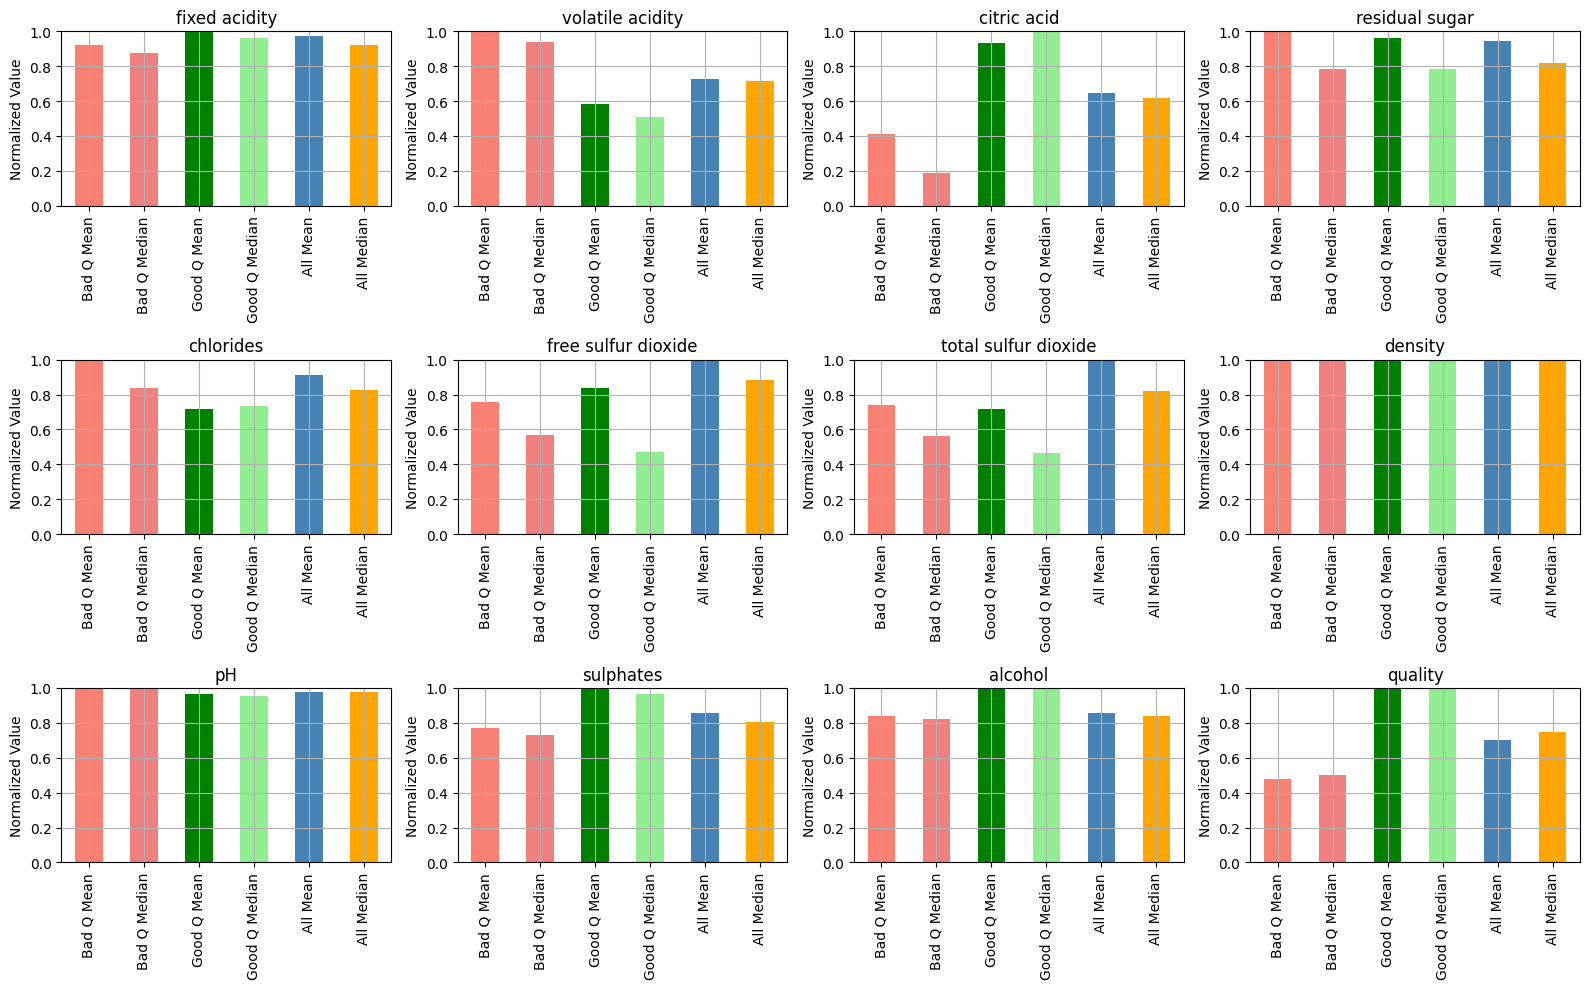

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

red_wine_bad = red_wine[(red_wine['quality'] == 3) | (red_wine['quality'] == 4)]
red_wine_good = red_wine[(red_wine['quality'] == 8) | (red_wine['quality'] == 9)]
mean_bad = red_wine_bad.mean()
median_bad = red_wine_bad.median()
mean_good = red_wine_good.mean()
median_good = red_wine_good.median()
mean_all = red_wine.mean()
median_all = red_wine.median()

mean_combined = pd.concat([mean_bad, median_bad, mean_good, median_good, mean_all, median_all], axis=1)
mean_combined.columns = ['Bad Q Mean', 'Bad Q Median', 'Good Q Mean', 'Good Q Median', 'All Mean', 'All Median']
mean_combined.round(3)

normalized_mean_combined = mean_combined.div(mean_combined.max(axis=1), axis=0)

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 10))
axes = axes.flatten()


for i, row in enumerate(normalized_mean_combined.index):
    normalized_mean_combined.loc[row].plot(kind='bar', ax=axes[i], color=['salmon', 'lightcoral', 'green', 'lightgreen', 'steelblue', 'orange'])
    axes[i].set_title(row)
    axes[i].set_ylabel('Normalized Value')
    axes[i].set_ylim(0, 1)
    axes[i].grid(True)


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()


# Сравнение красного и белого вина

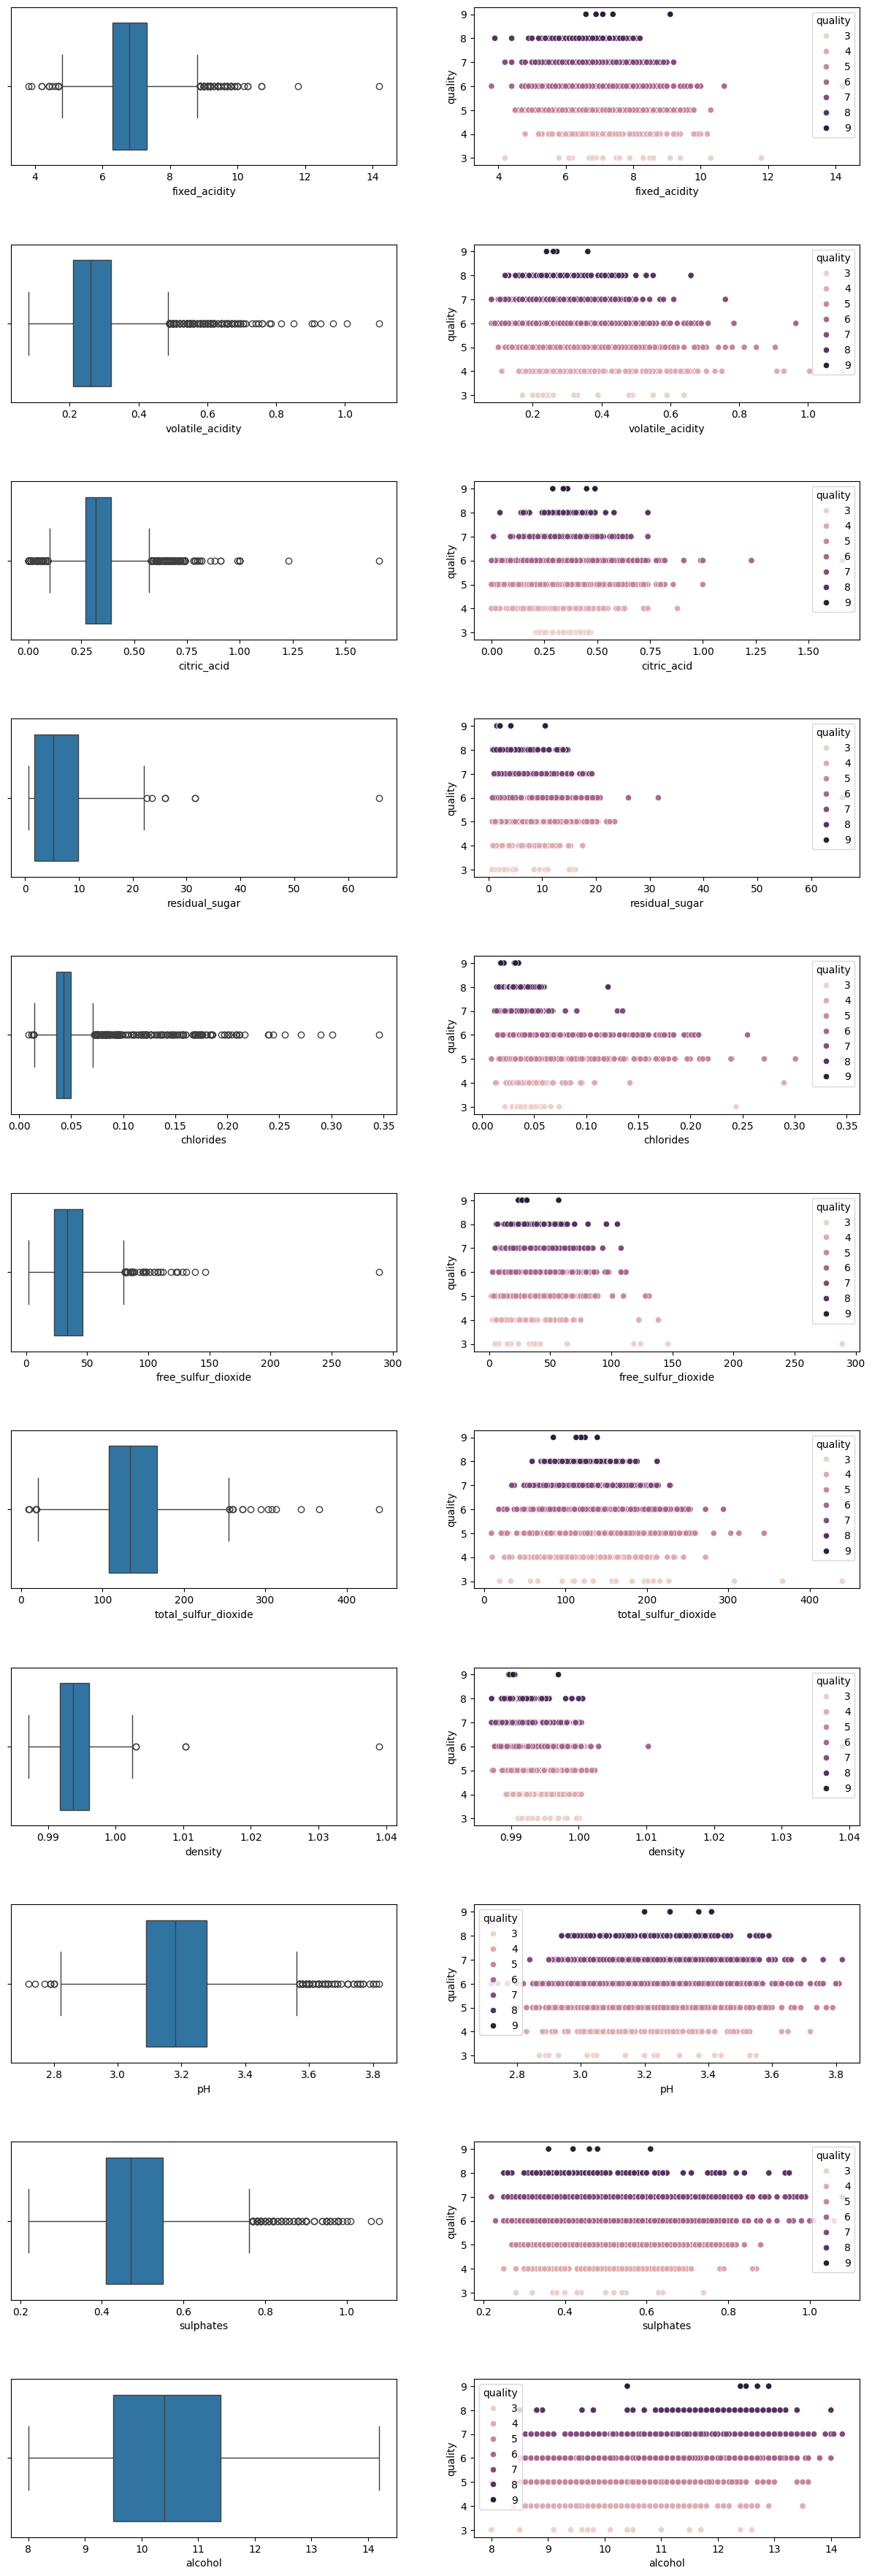

In [ ]:
white_wine.rename(columns = {"fixed acidity": "fixed_acidity",
                       "volatile acidity": "volatile_acidity",
                       "citric acid": "citric_acid",
                       "residual sugar": "residual_sugar",
                       "chlorides": "chlorides",
                       "free sulfur dioxide": "free_sulfur_dioxide",
                       "total sulfur dioxide": "total_sulfur_dioxide"},
            inplace = True)

columns = list(white_wine.columns)

fig, ax = plt.subplots(11, 2, figsize=(15, 45))
plt.subplots_adjust(hspace = 0.5)
for i in range(11) :
    # AX 1
    sns.boxplot(x=columns[i], data=white_wine, ax=ax[i, 0])
    # Ax 2
    sns.scatterplot(x=columns[i], y='quality', data=white_wine, hue='quality', ax=ax[i, 1])

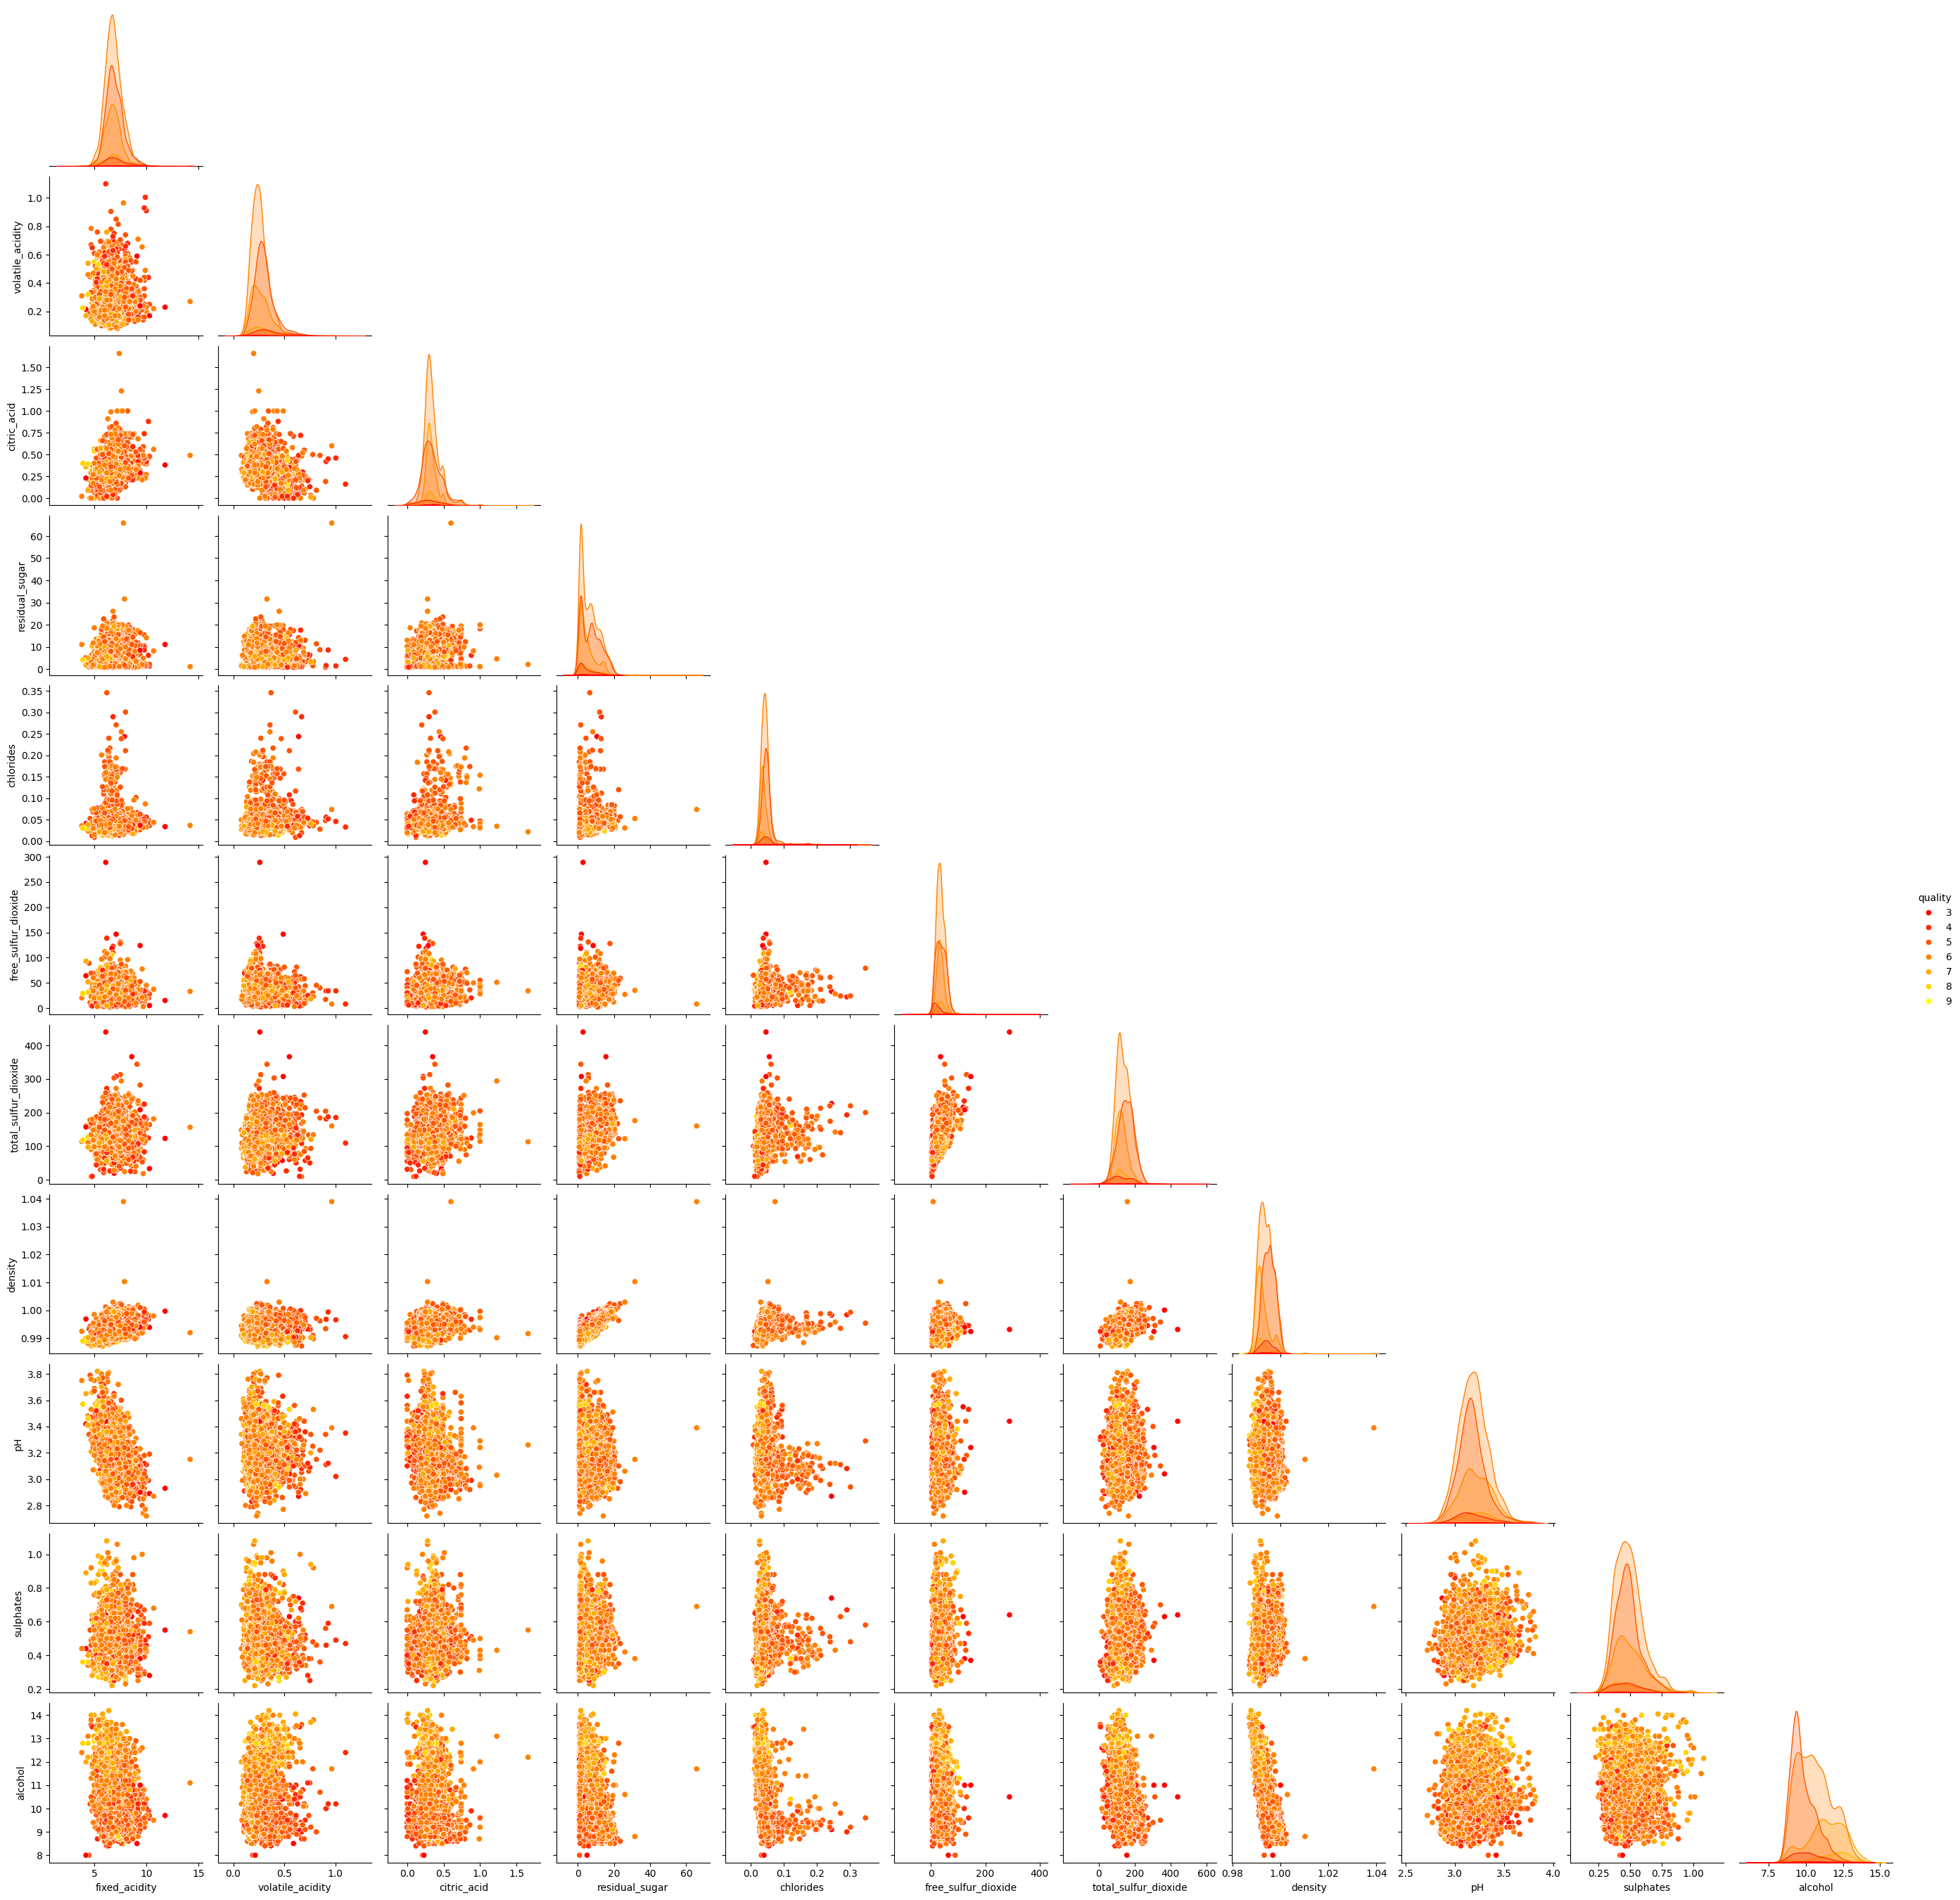

In [ ]:
g = sns.pairplot(white_wine, hue='quality', corner=True, palette='autumn')

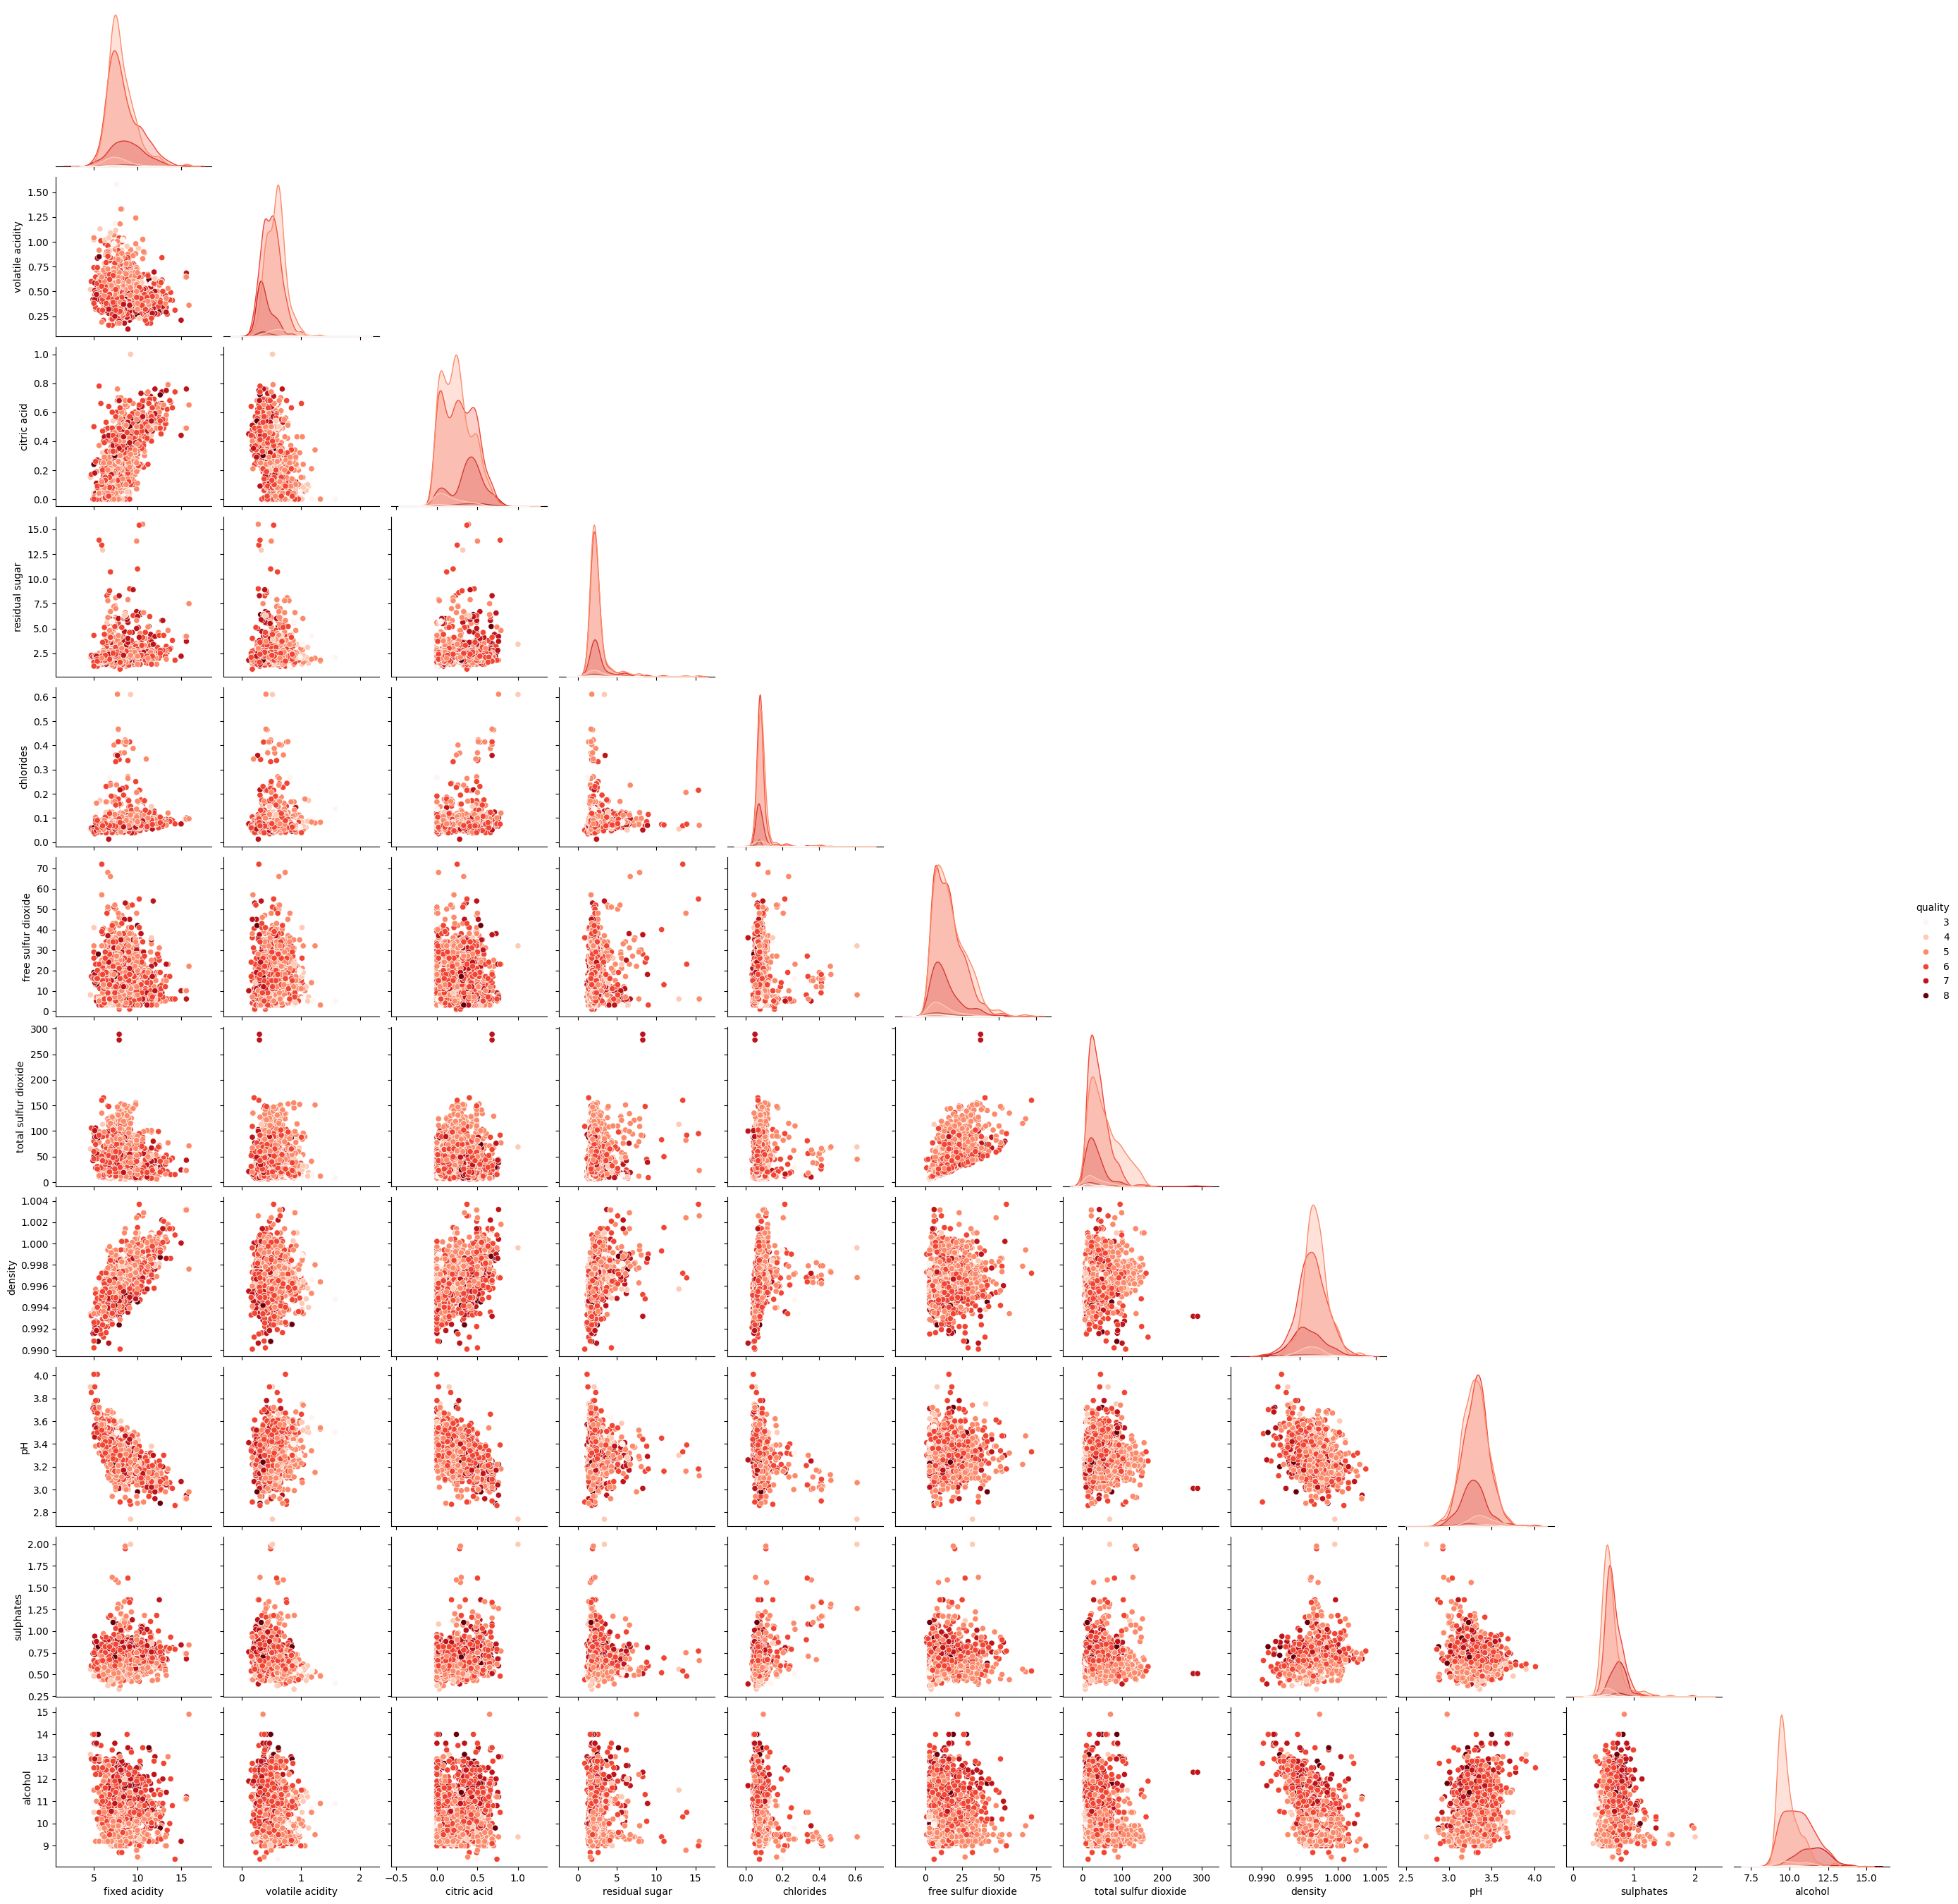

In [ ]:
sns.pairplot(red_wine, hue='quality', corner = True, palette='Reds')

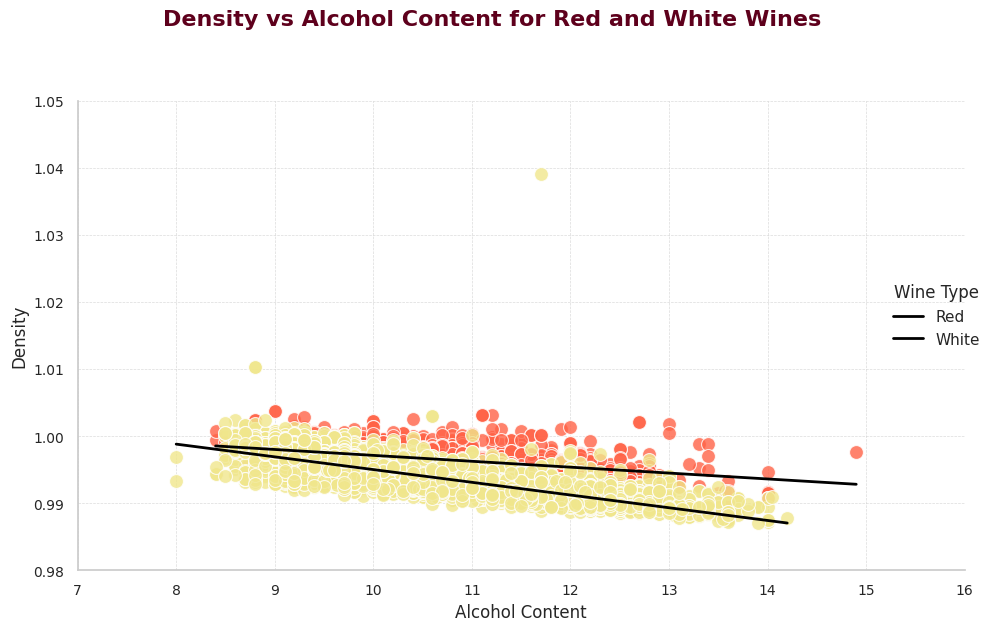

In [ ]:
combined_data = pd.concat([red_wine.assign(type='Red'), white_wine.assign(type='White')])
sns.set(style="whitegrid")


g = sns.FacetGrid(combined_data, hue='type', height=6, aspect=1.5, palette=['#FF6347', '#F0E68C'])


g.map(sns.scatterplot, 'alcohol', 'density', alpha=0.8, edgecolor='w', s=100)
g.map(sns.regplot, 'alcohol', 'density', scatter=False, ci=None, color='black', line_kws={'linewidth': 2})


g.set_titles("Density vs Alcohol Content")
g.set_axis_labels("Alcohol Content", "Density")
g.add_legend(title='Wine Type')


plt.suptitle('Density vs Alcohol Content for Red and White Wines', fontsize=16, fontweight='bold', color='#5e001c', y=1.05)
plt.grid(True, linestyle='--', alpha=0.7)


g.set_xticklabels(fontsize=10)
g.set_yticklabels(fontsize=10)


for ax in g.axes.flatten():
    ax.set_facecolor('white')
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)


plt.tight_layout()
plt.show()